# POSTTEST 5 KB
## Muhammad Nanda Arjuna Fadhillah
## 2109106028
## A1 Informatika 2021

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Memasukkan Dataset

In [2]:
dataset = pd.read_csv("whoDeaths.csv")
dataset.head(10)

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
0,Armenia,2006,3219235.0,54404,78,5.85,3.38,4.99,5.36
1,Armenia,2007,3107395.5,53660,0,5.50,3.38,4.99,5.02
2,Armenia,2008,3234031.0,54824,63,6.64,3.38,4.99,4.23
3,Armenia,2009,3066044.0,55120,53,8.44,3.38,4.99,4.06
4,Armenia,2012,3024127.0,55200,79,9.13,3.38,4.99,6.39
5,Armenia,2013,3021979.0,54392,67,10.32,3.38,4.99,5.31
6,Armenia,2014,3013839.0,55428,58,10.18,3.38,4.99,4.63
7,Armenia,2015,3004588.0,55756,74,10.12,3.38,4.99,4.70
8,Armenia,2016,2992364.0,56452,0,9.95,3.38,4.99,4.43
9,Armenia,2017,2912921.0,54250,0,10.36,3.38,4.99,2.43


In [3]:
dataset.isna().sum()

Country_Name         0
Year                 0
Population           0
Deaths_All_Types     0
Deaths_Suicides      0
HExp_Pctage_Y        0
MHExp_Pctage_2011    0
Dep_Num_2015         0
Suicide_p100         0
dtype: int64

In [4]:
dataset.dtypes

Country_Name          object
Year                   int64
Population           float64
Deaths_All_Types       int64
Deaths_Suicides        int64
HExp_Pctage_Y        float64
MHExp_Pctage_2011    float64
Dep_Num_2015         float64
Suicide_p100         float64
dtype: object

In [5]:
dataset['Deaths_Suicides'] = dataset['Deaths_Suicides'].fillna(dataset['Deaths_Suicides'].median())
dataset['Population'] = dataset['Population'].fillna(dataset['Population'].mean())
dataset['HExp_Pctage_Y'] = dataset['HExp_Pctage_Y'].fillna(dataset['HExp_Pctage_Y'].mean())
dataset['MHExp_Pctage_2011'] = dataset['MHExp_Pctage_2011'].fillna(dataset['MHExp_Pctage_2011'].mean())
dataset['Dep_Num_2015'] = dataset['Dep_Num_2015'].fillna(dataset['Dep_Num_2015'].mean())
dataset['Suicide_p100'] = dataset['Suicide_p100'].fillna(dataset['Suicide_p100'].mean())

In [6]:
dataset.isna().sum()

Country_Name         0
Year                 0
Population           0
Deaths_All_Types     0
Deaths_Suicides      0
HExp_Pctage_Y        0
MHExp_Pctage_2011    0
Dep_Num_2015         0
Suicide_p100         0
dtype: int64

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.drop_duplicates(inplace=True)
dataset[dataset.duplicated()]

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100


# Standarisasi

In [9]:
from sklearn.preprocessing import StandardScaler
np.std(dataset)
ss = StandardScaler()
x_scaled2 = ss.fit_transform(
    dataset[['Population',
                   'Deaths_All_Types',
                   'Deaths_Suicides',
                   'Suicide_p100']]
)
data_standarization = pd.DataFrame(x_scaled2)
np.std(x_scaled2)
np.mean(x_scaled2)

C:\Users\Last Man Standing\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


-4.34889621698743e-17

In [10]:
data_standarization.head()

,0,1,2,3
0,-0.674277,-0.645794,-0.169136,-0.997542
1,-0.677684,-0.647066,-0.241760,-1.059515
2,-0.673826,-0.645076,-0.183102,-1.203512
3,-0.678944,-0.644571,-0.192413,-1.234498
4,-0.680221,-0.644434,-0.168205,-0.809800


# Data Split

In [11]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [12]:
X = dataset[['Population',
             'Deaths_All_Types',
             'Deaths_Suicides',
             'Suicide_p100']]
Y = dataset['Country_Name']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# KNN

In [14]:
modelKNN = KNeighborsClassifier(n_neighbors = 5)

In [15]:
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [16]:
modelKNN.score(X_test, Y_test)

0.7744360902255639

In [17]:
modelKNN.score(X_train, Y_train)

0.8618090452261307

# Decision Tree


In [18]:
print(X_test.shape)
print(X_train.shape)

(133, 4)
(398, 4)


In [19]:
modelDTree = DecisionTreeClassifier().fit(X_train,Y_train)

In [21]:
import sklearn
prediction = modelDTree.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test, prediction))

[[3 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]]


In [22]:
print(sklearn.metrics.accuracy_score(Y_test, prediction)*100, '%')

94.73684210526315 %


# Naive Bayes

In [23]:
modelGNB = GaussianNB()
modelGNB.fit(X_train,Y_train)

GaussianNB()

In [24]:
modelGNB.score(X_train,Y_train)

0.9974874371859297

In [25]:
predictionGNB = modelGNB.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test, predictionGNB))

[[3 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 2]]


In [26]:
print(sklearn.metrics.accuracy_score(Y_test, predictionGNB)*100, '%')

96.2406015037594 %


In [27]:
print(sklearn.metrics.classification_report(Y_test, predictionGNB))

                     precision    recall  f1-score   support

            Armenia       1.00      1.00      1.00         3
          Australia       0.83      1.00      0.91         5
           Bulgaria       1.00      1.00      1.00         3
             Canada       1.00      1.00      1.00         1
             Cyprus       1.00      1.00      1.00         3
              Egypt       1.00      0.50      0.67         4
            Estonia       1.00      1.00      1.00         7
            Finland       1.00      1.00      1.00         4
             France       1.00      1.00      1.00         6
            Georgia       1.00      1.00      1.00         4
            Germany       1.00      1.00      1.00         3
            Hungary       1.00      1.00      1.00         4
            Iceland       1.00      1.00      1.00         4
              Italy       1.00      1.00      1.00         7
              Japan       1.00      1.00      1.00         4
         Kyrgyzstan    

C:\Users\Last Man Standing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Last Man Standing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Last Man Standing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [28]:
Y.unique()

array(['Armenia', 'Australia', 'Azerbaijan', 'Brazil', 'Bulgaria',
       'Canada', 'Costa Rica', 'Cyprus', 'Egypt', 'Estonia', 'Fiji',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Iran (Islamic Republic of)', 'Italy', 'Japan',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'Malaysia', 'Malta', 'Mongolia',
       'Netherlands', 'New Zealand', 'Poland', 'Portugal',
       'Republic of Moldova', 'Singapore', 'Slovenia', 'Solomon Islands',
       'Spain', 'Sweden', 'Syrian Arab Republic', 'Tajikistan',
       'Thailand', 'Tunisia', 'Uzbekistan'], dtype=object)

# Regression

In [33]:
from sklearn.linear_model import LinearRegression
x = dataset[["Population"]] 
y = dataset[["Deaths_All_Types"]]
modelLinReg = LinearRegression().fit(x_train, y_train)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)
y_pred = modelLinReg.predict(x_test)


In [34]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("MAE : ",mae)
print("R2 : ",r2)

MSE :  21919004989.39718
RMSE :  148050.68385318987
MAE :  84946.21001395413
R2 :  0.9296728418666411


# Visualisasi

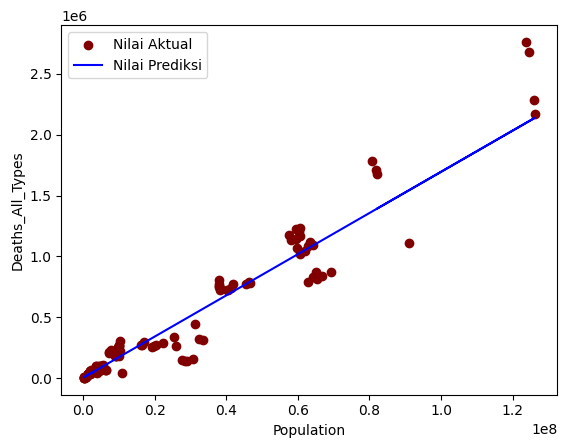

In [35]:
plt.scatter(x_test, y_test, color="maroon", label="Nilai Aktual")
plt.plot(x_test, y_pred, color="blue", label="Nilai Prediksi")
plt.xlabel("Population")
plt.ylabel("Deaths_All_Types")
plt.legend()
plt.show()

# Score Akurasi Naive Bayes : Score KNN : Score Decision Tree

In [39]:
print("Naive Bayes          : ",sklearn.metrics.accuracy_score(Y_test, predictionGNB)*100, '%')
print("KNN X_test & Y_test  : ",modelKNN.score(X_test, Y_test))
print("KNN X_train & Y_train: ",modelKNN.score(X_train, Y_train))
print("Decision Tree        : ",sklearn.metrics.accuracy_score(Y_test, prediction)*100, '%')

Naive Bayes          :  96.2406015037594 %
KNN X_test & Y_test  :  0.7744360902255639
KNN X_train & Y_train:  0.8618090452261307
Decision Tree        :  94.73684210526315 %
